In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
class logistic(nn.Module):
    def __init__(self):
        super(logistic, self).__init__()
        self.fc1 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return x
        
L = logistic().to(device = 'cuda')

In [3]:
Xtrain = torch.randn(100, 10).to(device='cuda')
Ytrain = torch.randint(0, 2, (100, 1)).float().to(device='cuda')

In [16]:
critera = nn.BCELoss()
optimizer = optim.Adam(L.parameters(), lr=0.001)

In [17]:
# TRAINING THE MODEL

num_epochs = 100
min_loss = float('inf')
epoch_to_impove = 0
loss_values = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = L(Xtrain)
    loss = critera(output, Ytrain)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

    if loss.item() < min_loss:
        min_loss = loss.item()
        epoch_to_improve = 0

    else:
        epoch_to_improve += 1
    
    if epoch_to_improve == 10:
        print('Early stopping')
        break


print("Logistic Regression Weights:", L.fc1.weight.data)
print("Logistic Regression Bias:", L.fc1.bias.data)

Epoch 1, Loss: 0.6447
Epoch 2, Loss: 0.6447
Epoch 3, Loss: 0.6447
Epoch 4, Loss: 0.6447
Epoch 5, Loss: 0.6447
Epoch 6, Loss: 0.6447
Epoch 7, Loss: 0.6447
Epoch 8, Loss: 0.6447
Epoch 9, Loss: 0.6447
Epoch 10, Loss: 0.6447
Epoch 11, Loss: 0.6447
Early stopping
Logistic Regression Weights: tensor([[ 0.0616,  0.0897, -0.2949, -0.1197, -0.3600,  0.3989,  0.1161, -0.1297,
         -0.2574, -0.1676]], device='cuda:0')
Logistic Regression Bias: tensor([-0.0711], device='cuda:0')


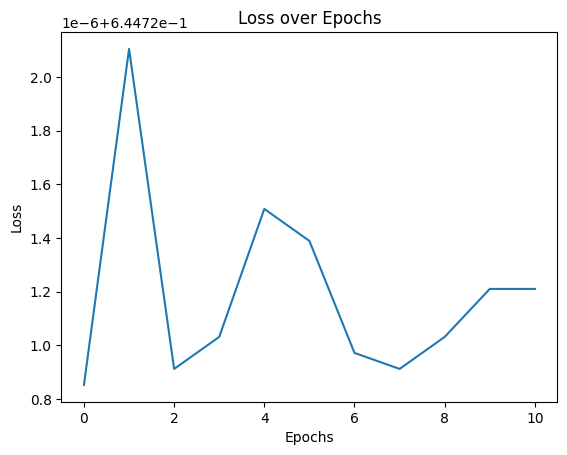

In [19]:
# Plotting the loss curve
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()